In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mflex.simulate.simulate_boundary import dipole, dipole_large
import numpy as np
from mflex.model.field.bfield_model import (
    magnetic_field,
    magnetic_field_low,
)
from mflex.plot.plot_magnetogram import (
    plot_fieldlines_polar_thesis,
)
from mflex.plot.plot_plasma_parameters import plot_deltaparam
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import (
    bpressure,
    bdensity,
    btemp,
    deltapres,
    deltaden,
    pres,
    den,
    temp,
    deltaden_low,
    deltapres_low,
)
from mflex.model.field.utility.height_profile import f_low, f
import matplotlib.colors

In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z
nf_max = 200
L = 1.0
print(xmin, ymin, zmin)
print(xmax, ymax, zmax)
print(pixelsize_x, pixelsize_y, pixelsize_z)
b = 1.0

# Background atmosphere parameters
z0 = 0.2
deltaz = 0.02

# Magnitc field parameters
z0_b = 0.2
deltaz_b = 0.02

h1 = 0.01  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = 1.0  # Maximum step length for fieldline3D

z_arr: np.ndarray[np.float64, np.dtype[np.float64]] = (
    np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
)

0.0 0.0 0.0
2.0 2.0 2.0
0.01 0.01 0.005


In [4]:
t_photosphere = 5600.0  # Temperature at z = 0 (on photosphere) in Kelvin
t_corona = 2.0 * 10.0**6  # Temperature at z = 2.0 (at 20 Mm) in Kelvin
t0 = (t_photosphere + t_corona * np.tanh(z0 / deltaz)) / (
    1.0 + np.tanh(z0 / deltaz)
)  # Temperature at z = z0 in Kelvin
t1 = (t_corona - t_photosphere) / (
    1.0 + np.tanh(z0 / deltaz)
)  # t_corona - t0 in Kelvin
g_solar = 274.0  # gravitational acceleration in m/s^2
kB = 1.380649 * 10**-23  # Boltzmann constant in Joule/ Kelvin = kg m^2/(Ks^2)
mbar = 1.67262 * 10**-27  # mean molecular weight (proton mass)
h = (
    kB * t0 / (mbar * g_solar) * 10**-6 * 10**-1
)  # pressure scale height in 10^4 km (10**-6 to convert to Mm, and 10**-1 to convert to 10Mm = 10^4 km)
rho0 = 3.0 * 10**-4  # plasma density at z = 0 in kg/(m^3)
b0 = 100.0  # Gauss background magnetic field strength in 10^-4 kg/(s^2A) = 10^-4 T
p0 = t_photosphere * kB * rho0 / mbar  # plasma pressure in kg/(s^2 m)
mu0 = 1.25663706 * 10**-6  # permeability of free space in mkg/(s^2A^2)
pB0 = (b0 * 10**-4) ** 2 / (2 * mu0)  # magnetic pressure b0**2 / 2mu0 in kg/(s^2m)
beta0 = p0 / pB0  # Plasma Beta, ration plasma to magnetic pressure
h_photo = h / t0 * t_photosphere

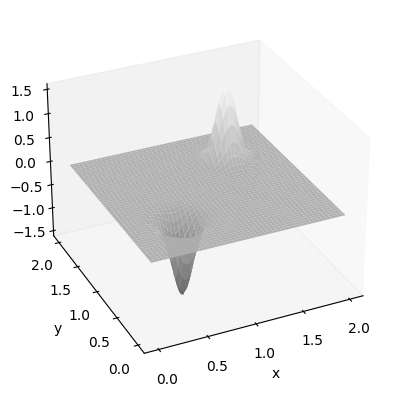

In [5]:
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

data_bz = np.zeros((nresol_y, nresol_x))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["dimgray", "whitesmoke"]
)

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz, cmap=cmap)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure2a.png"
# plt.savefig(plotname, dpi=300)
plt.show()

In [6]:
def check_runtime():
    a_pot = 0.0
    alpha_pot = 0.0

    bfield_pot, dbfield_pot = magnetic_field(
        data_bz,
        z0_b,
        deltaz,
        a_pot,
        b,
        alpha_pot,
        xmin,
        xmax,
        ymin,
        ymax,
        zmin,
        zmax,
        nresol_x,
        nresol_y,
        nresol_z,
        pixelsize_x,
        pixelsize_y,
        nf_max,
        L,
    )

    plot_fieldlines_polar_thesis(
        bfield_pot,
        h1,
        hmin,
        hmax,
        eps,
        nresol_x,
        nresol_y,
        nresol_z,
        -xmax,
        xmax,
        -ymax,
        ymax,
        zmin,
        zmax,
        a_pot,
        b,
        alpha_pot,
        nf_max,
        name="VonMises_angular",
        cmap=cmap,
    )

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


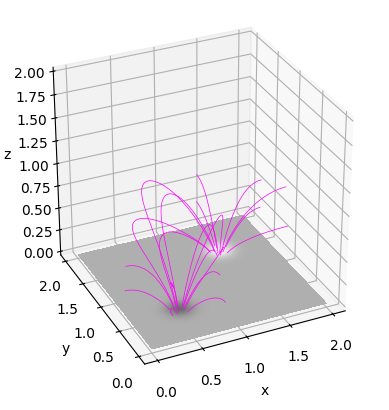

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


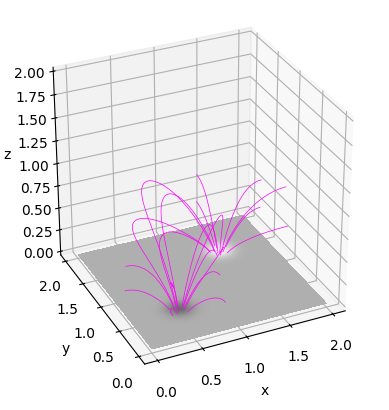

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


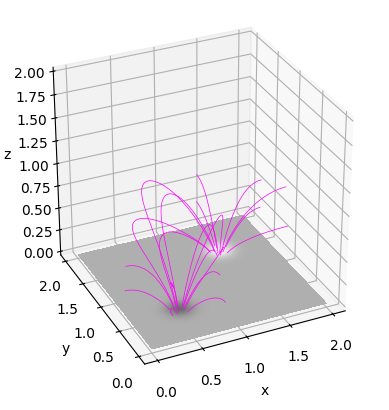

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


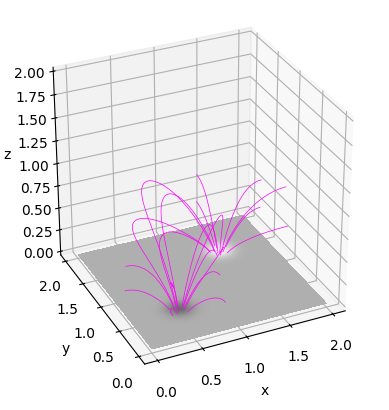

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


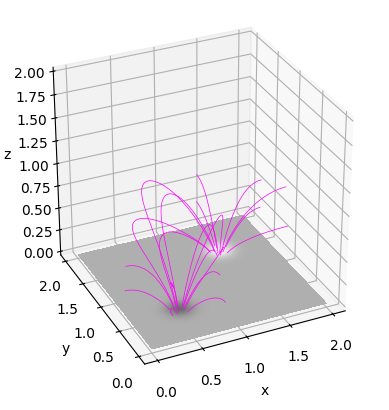

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


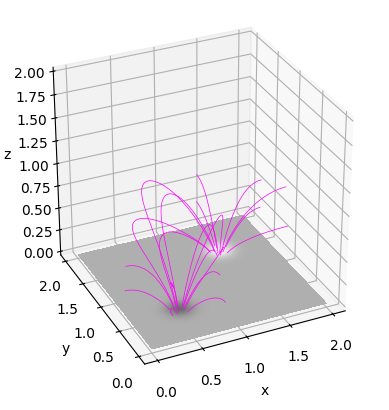

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


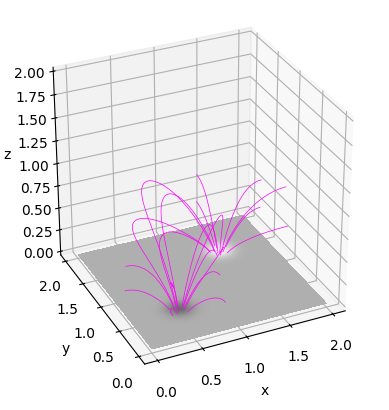

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


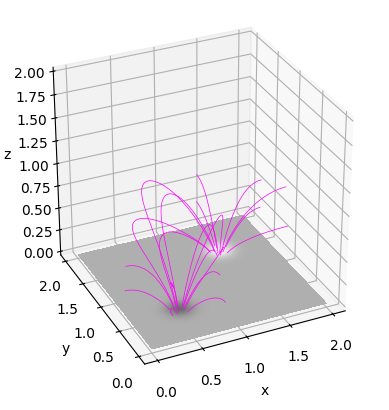

12.5 s ± 279 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit check_runtime()

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0


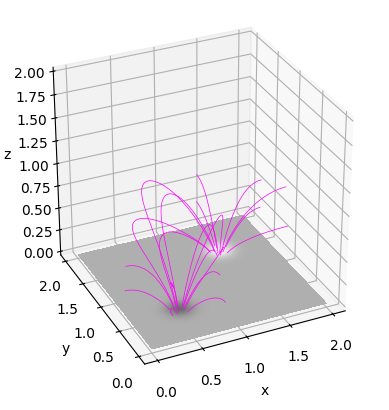

In [8]:
# Potential parameters

a_pot = 0.0
alpha_pot = 0.0

bfield_pot, dbfield_pot = magnetic_field(
    data_bz,
    z0_b,
    deltaz,
    a_pot,
    b,
    alpha_pot,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

plot_fieldlines_polar_thesis(
    bfield_pot,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_pot,
    b,
    alpha_pot,
    nf_max,
    name="VonMises_angular",
    cmap=cmap,
)

In [ ]:
fpres_3d_pot = np.zeros((nresol_z, nresol_y, nresol_x))
fden_3d_pot = np.zeros((nresol_z, nresol_y, nresol_x))
dpres_3d_pot = np.zeros((nresol_z, nresol_y, nresol_x))
dden_3d_pot = np.zeros((nresol_z, nresol_y, nresol_x))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        for iz in range(nresol_z):
            z = z_arr[iz]
            bz = bfield_pot[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dbfield_pot[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield_pot[nresol_y + iy, nresol_x + ix, iz, 1]
                + dbfield_pot[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield_pot[nresol_y + iy, nresol_x + ix, iz, 0]
                + dbfield_pot[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield_pot[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres_3d_pot[iz, iy, ix] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure(z, z0, deltaz, h, t0, t1)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a_pot, b, bz) / mu0 * 10**-8
            )
            fden_3d_pot[iz, iy, ix] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * bdensity(z, z0, deltaz, h, t0, t1)
                * 10**-14
                + deltaden(z, z0_b, deltaz_b, a_pot, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )
            dpres_3d_pot[iz, iy, ix] = deltapres(z, z0_b, deltaz_b, a_pot, b, bz)
            dden_3d_pot[iz, iy, ix] = deltaden(
                z, z0_b, deltaz_b, a_pot, b, bz, bzdotgradbz
            )

print("Pressure minimum lin", fpres_3d_pot.min())
print("Pressure minimum lin", fpres_3d_pot.argmin())
print("Density minimum lin", fden_3d_pot.min())
print("Density minimum lin", fden_3d_pot.argmin())

In [ ]:
# Linear force free parameters

a_lff = 0.0
alpha_lff = 0.25


bfield_lff, dbfield_lff = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a_lff,
    b,
    alpha_lff,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

plot_fieldlines_polar_thesis(
    bfield_lff,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_lff,
    b,
    alpha_lff,
    nf_max,
    name="VonMises_angular",
    cmap=cmap,
)

fpres_3d_lff = np.zeros((nresol_z, nresol_y, nresol_x))
fden_3d_lff = np.zeros((nresol_z, nresol_y, nresol_x))
dpres_3d_lff = np.zeros((nresol_z, nresol_y, nresol_x))
dden_3d_lff = np.zeros((nresol_z, nresol_y, nresol_x))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        for iz in range(nresol_z):
            z = z_arr[iz]
            bz = bfield_lff[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dbfield_lff[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield_lff[nresol_y + iy, nresol_x + ix, iz, 1]
                + dbfield_lff[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield_lff[nresol_y + iy, nresol_x + ix, iz, 0]
                + dbfield_lff[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield_lff[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres_3d_lff[iz, iy, ix] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure(z, z0, deltaz, h, t0, t1)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a_lff, b, bz) / mu0 * 10**-8
            )
            fden_3d_lff[iz, iy, ix] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * bdensity(z, z0, deltaz, h, t0, t1)
                * 10**-14
                + deltaden(z, z0_b, deltaz_b, a_lff, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )
            dpres_3d_lff[iz, iy, ix] = deltapres(z, z0_b, deltaz_b, a_lff, b, bz)
            dden_3d_lff[iz, iy, ix] = deltaden(
                z, z0_b, deltaz_b, a_lff, b, bz, bzdotgradbz
            )

print("Pressure minimum lin", fpres_3d_lff.min())
print("Pressure minimum lin", fpres_3d_lff.argmin())
print("Density minimum lin", fden_3d_lff.min())
print("Density minimum lin", fden_3d_lff.argmin())

In [ ]:
# Magnetohydristatic parameters 1

a_mhs1 = 0.22
alpha_mhs1 = 0.25

bfield_mhs1, dbfield_mhs1 = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a_mhs1,
    b,
    alpha_mhs1,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

plot_fieldlines_polar_thesis(
    bfield_mhs1,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_mhs1,
    b,
    alpha_mhs1,
    nf_max,
    name="VonMises_angular",
    cmap=cmap,
)

fpres_3d_mhs1 = np.zeros((nresol_z, nresol_y, nresol_x))
fden_3d_mhs1 = np.zeros((nresol_z, nresol_y, nresol_x))
dpres_3d_mhs1 = np.zeros((nresol_z, nresol_y, nresol_x))
dden_3d_mhs1 = np.zeros((nresol_z, nresol_y, nresol_x))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        for iz in range(nresol_z):
            z = z_arr[iz]
            bz = bfield_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dbfield_mhs1[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield_mhs1[nresol_y + iy, nresol_x + ix, iz, 1]
                + dbfield_mhs1[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield_mhs1[nresol_y + iy, nresol_x + ix, iz, 0]
                + dbfield_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres_3d_mhs1[iz, iy, ix] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure(z, z0, deltaz, h, t0, t1)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a_mhs1, b, bz) / mu0 * 10**-8
            )
            fden_3d_mhs1[iz, iy, ix] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * bdensity(z, z0, deltaz, h, t0, t1)
                * 10**-14
                + deltaden(z, z0_b, deltaz_b, a_mhs1, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )
            dpres_3d_mhs1[iz, iy, ix] = deltapres(z, z0_b, deltaz_b, a_mhs1, b, bz)
            dden_3d_mhs1[iz, iy, ix] = deltaden(
                z, z0_b, deltaz_b, a_mhs1, b, bz, bzdotgradbz
            )

print("Pressure minimum lin", fpres_3d_mhs1.min())
print("Pressure minimum lin", fpres_3d_mhs1.argmin())
print("Density minimum lin", fden_3d_mhs1.min())
print("Density minimum lin", fden_3d_mhs1.argmin())

In [ ]:
# Magnetohydrostatic parameters 2

a_mhs2 = 0.44
alpha_mhs2 = 0.25

bfield_mhs2, dbfield_mhs2 = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a_mhs2,
    b,
    alpha_mhs2,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

plot_fieldlines_polar_thesis(
    bfield_mhs2,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_mhs2,
    b,
    alpha_mhs2,
    nf_max,
    name="VonMises_angular",
    cmap=cmap,
)

fpres_3d_mhs2 = np.zeros((nresol_z, nresol_y, nresol_x))
fden_3d_mhs2 = np.zeros((nresol_z, nresol_y, nresol_x))
dpres_3d_mhs2 = np.zeros((nresol_z, nresol_y, nresol_x))
dden_3d_mhs2 = np.zeros((nresol_z, nresol_y, nresol_x))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        for iz in range(nresol_z):
            z = z_arr[iz]
            bz = bfield_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dbfield_mhs2[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield_mhs2[nresol_y + iy, nresol_x + ix, iz, 1]
                + dbfield_mhs2[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield_mhs2[nresol_y + iy, nresol_x + ix, iz, 0]
                + dbfield_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres_3d_mhs2[iz, iy, ix] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure(z, z0, deltaz, h, t0, t1)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a_mhs2, b, bz) / mu0 * 10**-8
            )
            fden_3d_mhs2[iz, iy, ix] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * bdensity(z, z0, deltaz, h, t0, t1)
                * 10**-14
                + deltaden(z, z0_b, deltaz_b, a_mhs2, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )
            dpres_3d_mhs2[iz, iy, ix] = deltapres(z, z0_b, deltaz_b, a_mhs2, b, bz)
            dden_3d_mhs2[iz, iy, ix] = deltaden(
                z, z0_b, deltaz_b, a_mhs2, b, bz, bzdotgradbz
            )

print("Pressure minimum lin", fpres_3d_mhs2.min())
print("Pressure minimum lin", fpres_3d_mhs2.argmin())
print("Density minimum lin", fden_3d_mhs2.min())
print("Density minimum lin", fden_3d_mhs2.argmin())

In [ ]:
maxcoord = np.unravel_index(np.argmax(data_bz, axis=None), data_bz.shape)
iy = int(maxcoord[0])
ix = int(maxcoord[1])

plt.plot(
    z_arr,
    dpres_3d_pot[:, iy, ix],
    label="a = 0.0",
    linewidth=0.5,
    color="black",
    linestyle="dotted",
)
plt.plot(
    z_arr,
    dpres_3d_lff[:, iy, ix],
    label="a = 0.0",
    linewidth=0.5,
    color="black",
    linestyle="dotted",
)
plt.plot(
    z_arr,
    dpres_3d_mhs1[:, iy, ix],
    label="a = 0.22",
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    dpres_3d_mhs2[:, iy, ix],
    label="a = 0.44",
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.legend()
plt.xlabel("z")
plt.ylabel("p")
plt.xlim([0.0, 2 * z0_b])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/VonMises_dp"
plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(
    z_arr,
    dden_3d_pot[:, iy, ix],
    label="a = 0.0",
    linewidth=0.5,
    color="black",
    linestyle="dotted",
)
plt.plot(
    z_arr,
    dden_3d_lff[:, iy, ix],
    label="a = 0.0",
    linewidth=0.5,
    color="black",
    linestyle="dotted",
)
plt.plot(
    z_arr,
    dden_3d_mhs1[:, iy, ix],
    label="a = 0.22",
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    dden_3d_mhs2[:, iy, ix],
    label="a = 0.44",
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.legend()
plt.xlabel("z")
plt.ylabel("p")
plt.xlim([0.0, 2 * z0_b])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/VonMises_dd"
plt.savefig(plotname, dpi=300)
plt.show()